In [29]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import segmentation_models as sm
import albumentations as A
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
sm.set_framework('tf.keras')
sm.framework()
print(tf.__version__)
print(tf.keras.__version__)

2.8.0
2.8.0


In [30]:
y_true = np.array([
    [
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]
    ],[
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]
    ],[
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.]
    ]
], dtype="float32")

In [31]:
y_true = np.array([
    [
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]
    ],[
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.]
    ],[
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.]
    ],[
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.]
    ]
], dtype="float32")

In [32]:
y_true.shape

(4, 4, 6)

In [33]:
y_preds = np.array([
    [
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]
    ],[
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]
    ],[
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.]
    ],[
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.]
    ]
], dtype="float32")

In [34]:
y_preds.shape

(4, 4, 6)

In [35]:
palette = np.array([[  0, 255, 255],
                   [255, 255,   0],
                   [255,   0, 255],
                   [  0, 255,   0],
                   [  0,   0, 255],
                   [255, 255, 255],
                   [  0,   0,   0]])  

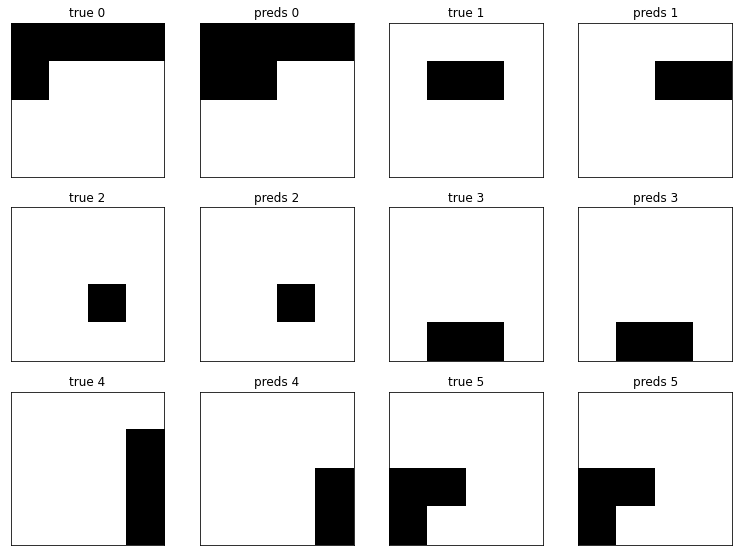

In [36]:
plt.figure(figsize=(13, 13))
plot_number = 1
for i in range(6):
  plt.subplot(4, 4, plot_number)
  plt.xticks([])
  plt.yticks([])
  plt.title("true {}".format(i))
  plt.imshow(y_true[:,:,i], cmap="binary")
  plot_number += 1
  plt.subplot(4, 4, plot_number)
  plt.xticks([])
  plt.yticks([])
  plt.title("preds {}".format(i))
  plt.imshow(y_preds[:,:,i], cmap="binary")
  plot_number += 1
plt.show()

In [37]:
r_y_true = np.argmax(y_true, axis=2)
r_y_true

array([[0, 0, 0, 0],
       [0, 1, 1, 4],
       [5, 5, 2, 4],
       [5, 3, 3, 4]])

In [38]:
r_y_preds = np.argmax(y_preds, axis=2)
r_y_preds

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [5, 5, 2, 4],
       [5, 3, 3, 4]])

In [39]:
tf_y_true = tf.expand_dims(y_true, axis=0)
tf_y_preds = tf.expand_dims(y_preds, axis=0)

In [40]:
 from sklearn.metrics import confusion_matrix  
 import numpy as np

 def compute_iou(y_pred, y_true):
     # ytrue, ypred is a flatten vector
     y_pred = y_pred.flatten()
     y_true = y_true.flatten()
     current = confusion_matrix(y_true, y_pred, labels=[0, 1])
     # compute mean iou
     intersection = np.diag(current)
     ground_truth_set = current.sum(axis=1)
     predicted_set = current.sum(axis=0)
     union = ground_truth_set + predicted_set - intersection
     IoU = intersection / union.astype(np.float32)
     # return np.mean(IoU)
     return np.nanmean(IoU)

In [41]:
def my_IoU(prediction, target):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    if str(iou_score) == "nan":
        return 0.0
    return iou_score

# loop all


In [42]:
import pprint as pp
pp.pprint("dfsd")

'dfsd'


layer 0
   [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


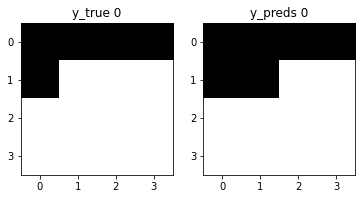

sm_iou_score (each time): tf.Tensor(0.8333336, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(0.8333336, shape=(), dtype=float32)
{'jaccard_score': [[0.9090909090909091, 0.8333333333333334]],
 'jaccard_score macro': [0.8712121212121212],
 'jaccard_score mean': [0.8712121212121212],
 'jaccard_score micro': [0.8823529411764706],
 'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>]}

layer 1
   [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


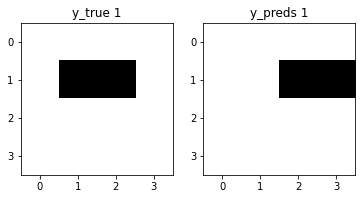

sm_iou_score (each time): tf.Tensor(0.33333555, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(0.33333555, shape=(), dtype=float32)
{'jaccard_score': [[0.9090909090909091, 0.8333333333333334],
                   [0.8666666666666667, 0.3333333333333333]],
 'jaccard_score macro': [0.8712121212121212, 0.6],
 'jaccard_score mean': [0.8712121212121212, 0.6],
 'jaccard_score micro': [0.8823529411764706, 0.7777777777777778],
 'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>]}

layer 2
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


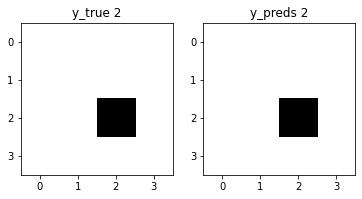

sm_iou_score (each time): tf.Tensor(1.0, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(1.0, shape=(), dtype=float32)
{'jaccard_score': [[0.9090909090909091, 0.8333333333333334],
                   [0.8666666666666667, 0.3333333333333333],
                   [1.0, 1.0]],
 'jaccard_score macro': [0.8712121212121212, 0.6, 1.0],
 'jaccard_score mean': [0.8712121212121212, 0.6, 1.0],
 'jaccard_score micro': [0.8823529411764706, 0.7777777777777778, 1.0],
 'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=1.0>]}

layer 3
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

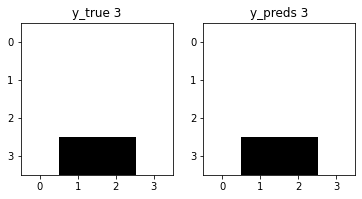

sm_iou_score (each time): tf.Tensor(1.0, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(1.0, shape=(), dtype=float32)
{'jaccard_score': [[0.9090909090909091, 0.8333333333333334],
                   [0.8666666666666667, 0.3333333333333333],
                   [1.0, 1.0],
                   [1.0, 1.0]],
 'jaccard_score macro': [0.8712121212121212, 0.6, 1.0, 1.0],
 'jaccard_score mean': [0.8712121212121212, 0.6, 1.0, 1.0],
 'jaccard_score micro': [0.8823529411764706, 0.7777777777777778, 1.0, 1.0],
 'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
              

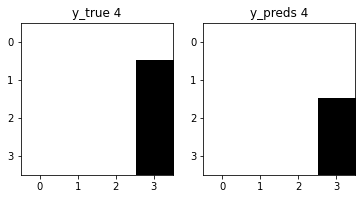

sm_iou_score (each time): tf.Tensor(0.66666776, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(0.66666776, shape=(), dtype=float32)
{'jaccard_score': [[0.9090909090909091, 0.8333333333333334],
                   [0.8666666666666667, 0.3333333333333333],
                   [1.0, 1.0],
                   [1.0, 1.0],
                   [0.9285714285714286, 0.6666666666666666]],
 'jaccard_score macro': [0.8712121212121212, 0.6, 1.0, 1.0, 0.7976190476190477],
 'jaccard_score mean': [0.8712121212121212, 0.6, 1.0, 1.0, 0.7976190476190477],
 'jaccard_score micro': [0.8823529411764706,
                         0.7777777777777778,
                         1.0,
                         1.0,
                         0.8823529411764706],
 'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                  <tf.

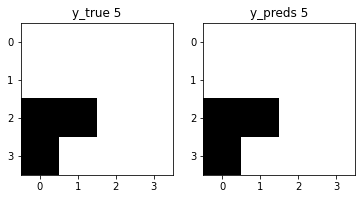

sm_iou_score (each time): tf.Tensor(1.0, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(1.0, shape=(), dtype=float32)
{'jaccard_score': [[0.9090909090909091, 0.8333333333333334],
                   [0.8666666666666667, 0.3333333333333333],
                   [1.0, 1.0],
                   [1.0, 1.0],
                   [0.9285714285714286, 0.6666666666666666],
                   [1.0, 1.0]],
 'jaccard_score macro': [0.8712121212121212,
                         0.6,
                         1.0,
                         1.0,
                         0.7976190476190477,
                         1.0],
 'jaccard_score mean': [0.8712121212121212,
                        0.6,
                        1.0,
                        1.0,
                        0.7976190476190477,
                        1.0],
 'jaccard_score micro': [0.8823529411764706,
                         0.7777777777777778,
                         1.0,
                         1.0,
          

In [ ]:
ious = {}
ious["jaccard_score"] = []
ious["jaccard_score mean"] = []
ious["jaccard_score micro"] = []
ious["jaccard_score macro"] = []
ious["sm_iou_score"] = []
ious["sm_iou_score threshold=0.5"] = []
for i in range(6):
    print("layer", i)
    target = y_true[:,:,i].flatten()
    prediction = y_preds[:,:,i].flatten()
    print("  ", target)
    print("  ", prediction)
    plt.subplot(1, 2, 1)
    plt.imshow(y_true[:,:,i], cmap="binary")
    plt.title("y_true {}".format(i))
    plt.subplot(1, 2, 2)
    plt.imshow(y_preds[:,:,i], cmap="binary")
    plt.title("y_preds {}".format(i))
    plt.show()
    # print(confusion_matrix(target, prediction,labels=[0, 1]))
    ious["jaccard_score"].append(list(jaccard_score(target, prediction, average=None, zero_division=1.0)))
    ious["jaccard_score mean"].append(np.mean(jaccard_score(target, prediction, average=None, zero_division=1.0)))
    ious["jaccard_score micro"].append(jaccard_score(target, prediction, average="micro", zero_division=1.0))
    ious["jaccard_score macro"].append(jaccard_score(target, prediction, average="macro", zero_division=1.0))
    sm_iou_score = sm.metrics.IOUScore()
    print("sm_iou_score (each time):",sm_iou_score(tf.expand_dims(y_true[:,:,i], axis=-1), tf.expand_dims(y_preds[:,:,i], axis=-1)))
    sm_iou_score = sm.metrics.IOUScore(threshold=0.5)
    print("sm_iou_score (each time, threshold=0.5):",sm_iou_score(tf.expand_dims(y_true[:,:,i], axis=-1), tf.expand_dims(y_preds[:,:,i], axis=-1)))
    sm_iou_score = sm.metrics.IOUScore()
    ious["sm_iou_score"].append(sm_iou_score(tf.expand_dims(y_true[:,:,i], axis=-1), tf.expand_dims(y_preds[:,:,i], axis=-1)))
    sm_iou_score = sm.metrics.IOUScore(threshold=0.5)
    ious["sm_iou_score threshold=0.5"].append(sm_iou_score(tf.expand_dims(y_true[:,:,i], axis=-1), tf.expand_dims(y_preds[:,:,i], axis=-1)))
    pp.pprint(ious)
    print("")

print("*"*50)              
pp.pprint(ious)
print("*"*50)  
print("""'binary':
    Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.
'micro':
    Calculate metrics globally by counting the total true positives, false negatives and false positives.
'macro':
    Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
""")
print("jaccard_score 1 only", np.mean([x[1] for x in ious["jaccard_score"] if x!=0.0]))
print("jaccard_score mean", np.mean([x for x in ious["jaccard_score mean"] if x!=1.0]))
print("jaccard_score micro", np.mean([x for x in ious["jaccard_score micro"] if x!=1.0]))
print("jaccard_score macro", np.mean([x for x in ious["jaccard_score macro"] if x!=1.0]))
print("sm_iou_score np.mean", np.mean([x for x in ious["sm_iou_score"] if x!=1.0]))
print("sm_iou_score threshold=0.5 np.mean", np.mean([x for x in ious["sm_iou_score threshold=0.5"] if x!=1.0]))
sm_iou_score = sm.metrics.IOUScore()
print("sm_iou_score (no threshold):",sm_iou_score(y_true, y_preds))
sm_iou_score = sm.metrics.IOUScore(threshold=0.5)
print("sm_iou_score (threshold 0.5):",sm_iou_score(tf_y_true, tf_y_preds))

m = tf.keras.metrics.OneHotMeanIoU(num_classes=7)
m.update_state(y_true=y_true, y_pred=y_preds)
print("tf.keras.metrics.OneHotMeanIoU:", m.result().numpy())
m = tf.keras.metrics.MeanIoU(num_classes=7)
m.update_state(y_true=r_y_true, y_pred=r_y_preds)
print("tf.keras.metrics.MeanIoU:", m.result().numpy())

m = tf.keras.metrics.IoU(num_classes=7, target_class_ids=[0,1,2,3,4,5,6])
m.update_state(y_true=r_y_true, y_pred=r_y_preds)
print("tf.keras.metrics.IoU:", m.result().numpy())
                                 
# print("jaccard_score", jaccard_score(r_y_true, r_y_preds, average='samples'))



https://medium.com/@cyborg.team.nitr/miou-calculation-4875f918f4cb


layer 0
   [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


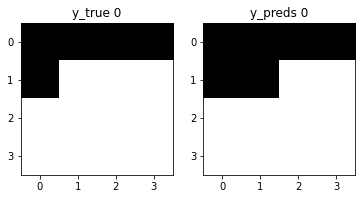

[[10  1]
 [ 0  5]]
tf.keras.metrics.IoU: 0.8333333
sm_iou_score (each time): tf.Tensor(0.8333336, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(0.8333336, shape=(), dtype=float32)
{'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>]}

layer 1
   [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


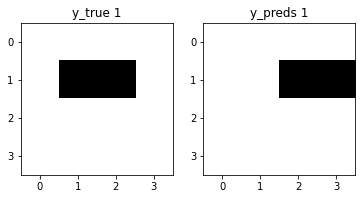

[[13  1]
 [ 1  1]]
tf.keras.metrics.IoU: 0.33333334
sm_iou_score (each time): tf.Tensor(0.33333555, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(0.33333555, shape=(), dtype=float32)
{'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>]}

layer 2
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


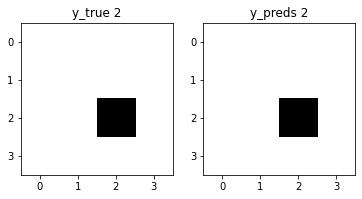

[[15  0]
 [ 0  1]]
tf.keras.metrics.IoU: 1.0
sm_iou_score (each time): tf.Tensor(1.0, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(1.0, shape=(), dtype=float32)
{'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=1.0>]}

layer 3
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]


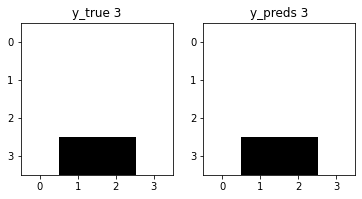

[[14  0]
 [ 0  2]]
tf.keras.metrics.IoU: 1.0
sm_iou_score (each time): tf.Tensor(1.0, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(1.0, shape=(), dtype=float32)
{'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=1.0>]}

layer 4
   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]


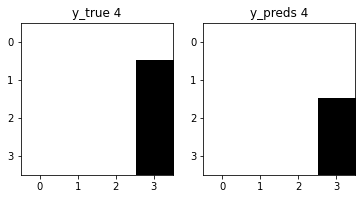

[[13  0]
 [ 1  2]]
tf.keras.metrics.IoU: 0.6666667
sm_iou_score (each time): tf.Tensor(0.66666776, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(0.66666776, shape=(), dtype=float32)
{'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.66666776>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=0.66666776>]}

layer

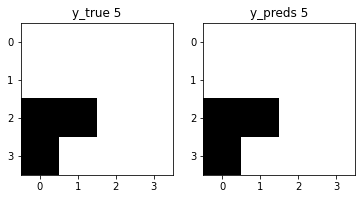

[[13  0]
 [ 0  3]]
tf.keras.metrics.IoU: 1.0
sm_iou_score (each time): tf.Tensor(1.0, shape=(), dtype=float32)
sm_iou_score (each time, threshold=0.5): tf.Tensor(1.0, shape=(), dtype=float32)
{'sm_iou_score': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=0.66666776>,
                  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>],
 'sm_iou_score threshold=0.5': [<tf.Tensor: shape=(), dtype=float32, numpy=0.8333336>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=0.33333555>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                                <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
                                <tf.Tensor: shap

In [63]:
ious = {}
ious["sm_iou_score"] = []
ious["sm_iou_score threshold=0.5"] = []
for i in range(6):
    print("layer", i)
    target = y_true[:,:,i].flatten()
    prediction = y_preds[:,:,i].flatten()
    print("  ", target)
    print("  ", prediction)
    plt.subplot(1, 2, 1)
    plt.imshow(y_true[:,:,i], cmap="binary")
    plt.title("y_true {}".format(i))
    plt.subplot(1, 2, 2)
    plt.imshow(y_preds[:,:,i], cmap="binary")
    plt.title("y_preds {}".format(i))
    plt.show()
    print(confusion_matrix(target, prediction,labels=[0, 1]))
    m = tf.keras.metrics.IoU(num_classes=2, target_class_ids=[1])
    m.update_state(y_true=tf.expand_dims(y_true[:,:,i], axis=-1), y_pred=tf.expand_dims(y_preds[:,:,i], axis=-1))
    print("tf.keras.metrics.IoU:", m.result().numpy())
    sm_iou_score = sm.metrics.IOUScore()
    print("sm_iou_score (each time):",sm_iou_score(tf.expand_dims(y_true[:,:,i], axis=-1), tf.expand_dims(y_preds[:,:,i], axis=-1)))
    sm_iou_score = sm.metrics.IOUScore(threshold=0.5)
    print("sm_iou_score (each time, threshold=0.5):",sm_iou_score(tf.expand_dims(y_true[:,:,i], axis=-1), tf.expand_dims(y_preds[:,:,i], axis=-1)))
    sm_iou_score = sm.metrics.IOUScore()
    ious["sm_iou_score"].append(sm_iou_score(tf.expand_dims(y_true[:,:,i], axis=-1), tf.expand_dims(y_preds[:,:,i], axis=-1)))
    sm_iou_score = sm.metrics.IOUScore(threshold=0.5)
    ious["sm_iou_score threshold=0.5"].append(sm_iou_score(tf.expand_dims(y_true[:,:,i], axis=-1), tf.expand_dims(y_preds[:,:,i], axis=-1)))
    pp.pprint(ious)
    print("")

print("*"*50)              
pp.pprint(ious)
print("*"*50)  
print("sm_iou_score np.mean", np.mean([x for x in ious["sm_iou_score"] if x!=1.0]))
print("sm_iou_score threshold=0.5 np.mean", np.mean([x for x in ious["sm_iou_score threshold=0.5"] if x!=1.0]))

sm_iou_score = sm.metrics.IOUScore(threshold=0.5)
print("sm_iou_score (threshold 0.5):",sm_iou_score(tf_y_true, tf_y_preds))

m = tf.keras.metrics.OneHotMeanIoU(num_classes=7)
m.update_state(y_true=y_true, y_pred=y_preds)
print("tf.keras.metrics.OneHotMeanIoU:", m.result().numpy())
m = tf.keras.metrics.MeanIoU(num_classes=7)
m.update_state(y_true=r_y_true, y_pred=r_y_preds)
print("tf.keras.metrics.MeanIoU:", m.result().numpy())

m = tf.keras.metrics.IoU(num_classes=7, target_class_ids=[0,1,2,3,4,5,6])
m.update_state(y_true=r_y_true, y_pred=r_y_preds)
print("tf.keras.metrics.IoU:", m.result().numpy())
                                 
# print("jaccard_score", jaccard_score(r_y_true, r_y_preds, average='samples'))



In [268]:
y_true = tf.constant([
    [0., 1., 0.], 
    [1., 0., 0.], 
    [0., 1., 0.], 
    [1., 0., 0.]
])
y_pred = tf.constant([
    [0., 1., 0.], 
    [0., 1., 0.], 
    [0., 1., 0.], 
    [1., 0., 0.]
])
tf_y_true = tf.expand_dims(y_true, axis=0)
tf_y_true = tf.expand_dims(tf_y_true, axis=0)

tf_y_pred = tf.expand_dims(y_pred, axis=0)
tf_y_pred = tf.expand_dims(tf_y_pred, axis=0)
m = tf.keras.metrics.OneHotMeanIoU(num_classes=3)
m.update_state(y_true=y_true, y_pred=y_pred)
# cm = [[0, 0, 0.2+0.4],
#       [0.3, 0, 0],
#       [0, 0, 0.1]]
# sum_row = [0.3, 0, 0.7], sum_col = [0.6, 0.3, 0.1]
# true_positives = [0, 0, 0.1]
# single_iou = true_positives / (sum_row + sum_col - true_positives))
# mean_iou = (0 + 0 + 0.1 / (0.7 + 0.1 - 0.1)) / 3
m.result().numpy()



0.5833334

In [253]:
tf_y_true

<tf.Tensor: shape=(1, 1, 4, 3), dtype=float32, numpy=
array([[[[0., 1., 0.],
         [1., 0., 0.],
         [0., 1., 0.],
         [1., 0., 0.]]]], dtype=float32)>

In [254]:
r_y_true = np.argmax(tf_y_true, axis=-1)
r_y_true

array([[[1, 0, 1, 0]]])

In [255]:
r_y_pred = np.argmax(tf_y_pred, axis=-1)
r_y_pred

array([[[1, 1, 1, 0]]])

([], [])

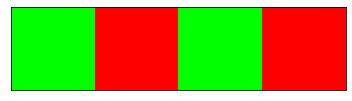

In [269]:
plt.imshow(tf_y_true[0,:,:,:], vmin=0, vmax=1) 
plt.xticks([])
plt.yticks([])

([], [])

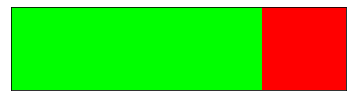

In [257]:
plt.imshow(tf_y_pred[0,:,:,:], vmin=0, vmax=1) 
plt.xticks([])
plt.yticks([])

([], [])

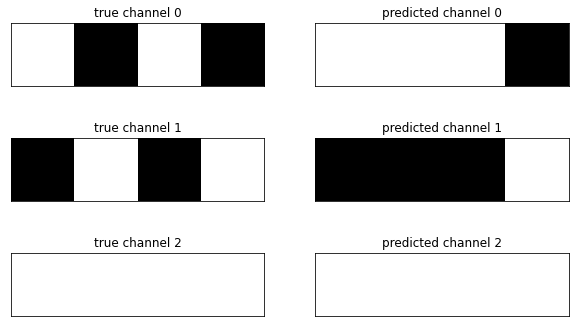

In [275]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 2, 1) 
plt.title("true channel 0")
plt.imshow(tf_y_true[0,:,:,0],  cmap='binary', vmin=0, vmax=1) 
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 2) 
plt.title("predicted channel 0")
plt.imshow(tf_y_pred[0,:,:,0],  cmap='binary', vmin=0, vmax=1) 
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 3) 
plt.title("true channel 1")
plt.imshow(tf_y_true[0,:,:,1],  cmap='binary', vmin=0, vmax=1) 
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 4) 
plt.title("predicted channel 1")
plt.imshow(tf_y_pred[0,:,:,1],  cmap='binary', vmin=0, vmax=1) 
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 5) 
plt.title("true channel 2")
plt.imshow(tf_y_true[0,:,:,2],  cmap='binary', vmin=0, vmax=1) 
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 6) 
plt.title("predicted channel 2")
plt.imshow(tf_y_pred[0,:,:,2],  cmap='binary', vmin=0, vmax=1) 
plt.xticks([])
plt.yticks([])

In [259]:
print(list(jaccard_score(np.squeeze(tf_y_true[0,:,:,0]), np.squeeze(tf_y_pred[0,:,:,0]), average=None, zero_division=1.0)))
print(list(jaccard_score(np.squeeze(tf_y_true[0,:,:,1]), np.squeeze(tf_y_pred[0,:,:,1]), average=None, zero_division=1.0)))
print(list(jaccard_score(np.squeeze(tf_y_true[0,:,:,2]), np.squeeze(tf_y_pred[0,:,:,2]), average=None, zero_division=1.0)))

[0.6666666666666666, 0.5]
[0.5, 0.6666666666666666]
[1.0]


In [260]:
sm_iou_score = sm.metrics.IOUScore(threshold=0.5)
print("sm_iou_score (threshold 0.5):",sm_iou_score(tf_y_true, tf_y_pred))

sm_iou_score (threshold 0.5): tf.Tensor(0.72222346, shape=(), dtype=float32)


In [261]:
sm_iou_score = sm.metrics.IOUScore(threshold=0.5, class_indexes=[0])
print("sm_iou_score (threshold 0.5):",sm_iou_score(tf_y_true, tf_y_pred))

sm_iou_score (threshold 0.5): tf.Tensor(0.5000025, shape=(), dtype=float32)


In [262]:
sm_iou_score = sm.metrics.IOUScore(threshold=0.5, class_indexes=[1])
print("sm_iou_score (threshold 0.5):",sm_iou_score(tf_y_true, tf_y_pred))

sm_iou_score (threshold 0.5): tf.Tensor(0.66666776, shape=(), dtype=float32)


In [263]:
sm_iou_score = sm.metrics.IOUScore(threshold=0.5, class_indexes=[2])
print("sm_iou_score (threshold 0.5):",sm_iou_score(tf_y_true, tf_y_pred))

sm_iou_score (threshold 0.5): tf.Tensor(1.0, shape=(), dtype=float32)


In [188]:
results  = [[1.0, 1.0],
[0.3333333333333333, 0.3333333333333333],
[0.5, 0.0]]
ans = 0
for r in results:
    ans += r[1]
print(ans/3)

0.4444444444444444


In [271]:
print(f"IoU = 1/2 = 0.5")

IoU = 1/2 = 0.5


In [281]:
(0.5+0.667+1.0)/3


0.7223333333333333

In [282]:
(0.5+0.667)/2

0.5835